## Importing libraries

In [2]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

## Reading image

In [3]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

In [4]:
!echo "Images avaialable : "; ls TestData/Images/

Images avaialable : 
chessboard_2.jpg  gect.jpg    notes_inv.png  teapot.png
chessboard.jpg	  monkey.jpg  notes.png


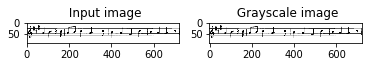

In [5]:
image_name = "notes.png"
image_path = "TestData/Images/" + image_name

img = cv2.imread(image_path)

if img is None:
    print(" Image could not be read")
else:
    img = ResizeWithAspectRatio(img, width=720)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(" Input image")

    plt.subplot(1, 2, 2)
    plt.imshow(img_gray, cmap="gray")
    plt.title(" Grayscale image")

    plt.show()

In [9]:
## Erosion and dilation
dh = 5
dw = 5
noise = 10

def update_dh(x): 
    global dh
    if(x > 0):
        dh = x
def update_dw(x): 
    global dw
    if(x > 0):
        dw = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("dilate, erode")
cv2.createTrackbar("dh", "dilate, erode", dh, 10, update_dh)
cv2.createTrackbar("dw", "dilate, erode", dw, 10, update_dw)
cv2.createTrackbar("noise", "dilate, erode", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    dilated = cv2.morphologyEx(img, cv2.MORPH_DILATE, np.ones((dh, dw)))
    eroded = cv2.morphologyEx(img, cv2.MORPH_ERODE, np.ones((dh, dw)))

    out = np.concatenate((dilated, eroded), axis=1)
    
    cv2.imshow("dilate, erode", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [12]:
## Opening and closing
dh = 5
dw = 5
noise = 10

def update_dh(x): 
    global dh
    if(x > 0):
        dh = x
def update_dw(x): 
    global dw
    if(x > 0):
        dw = x
def update_noise(x):
    global noise
    noise = x

win_name = "open, close"

cv2.namedWindow(win_name)
cv2.createTrackbar("dh", win_name, dh, 10, update_dh)
cv2.createTrackbar("dw", win_name, dw, 10, update_dw)
cv2.createTrackbar("noise", win_name, noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((dh, dw)))
    closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((dh, dw)))

    out = np.concatenate((opened, closed), axis=1)
    
    cv2.imshow(win_name, out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [48]:
## Gradient
dh = 5
dw = 5
noise = 10

def update_dh(x): 
    global dh
    if(x > 0):
        dh = x
def update_dw(x): 
    global dw
    if(x > 0):
        dw = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("opening")
cv2.createTrackbar("dh", "opening", dh, 10, update_dh)
cv2.createTrackbar("dw", "opening", dw, 10, update_dw)
cv2.createTrackbar("noise", "opening", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    noised_img = (img_gray + noise * np.random.randn(img_gray.shape[0], img_gray.shape[1])).astype(np.uint8)
    
    cv2.imshow("Noised image", noised_img)

    out=cv2.erode(noised_img, np.ones((dh,dw)))
    out=cv2.dilate(out, np.ones((dh,dw)))
    
    cv2.imshow("opening", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()

In [45]:
## Opening
dh = 5
dw = 5
noise = 10

def update_dh(x): 
    global dh
    if(x > 0):
        dh = x
def update_dw(x): 
    global dw
    if(x > 0):
        dw = x
def update_noise(x):
    global noise
    noise = x

cv2.namedWindow("closing")
cv2.createTrackbar("dh", "closing", dh, 10, update_dh)
cv2.createTrackbar("dw", "closing", dw, 10, update_dw)
cv2.createTrackbar("noise", "closing", noise, 256, update_noise)

cv2.imshow("Original image", img_gray)

while(True):
    noised_img = (img_gray + noise * np.random.randn(img_gray.shape[0], img_gray.shape[1])).astype(np.uint8)
    noised_img = img_gray
    
    cv2.imshow("Noised image", noised_img)

    out=cv2.dilate(noised_img, np.ones((dh,dw)))
    out=cv2.erode(out, np.ones((dh,dw)))
    
    cv2.imshow("closing", out)

    k = cv2.waitKey(100) & 0xFF
    
    if k == ord('q'):
        break

cv2.destroyAllWindows()